# 02-regression-homework- California Housing Prices - Homework
 [Goal - create a regression model for predicting housing prices (column 'median_house_value')]

### Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter
import os as os
import shutil as shutil
import wget

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Get the Dataset : Hosuing Price

In [3]:
# Get California Housing Prices data from Kaggle.    
dataset_url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
dataset_filename = 'housing.csv'
dataset_filename_bk =  'housing_bk.csv'

# If file exists then take a backup and delete
if(os.path.isfile(dataset_filename) ):
    print(f'\nTaking backup and deleting already existing file: {dataset_filename}')
    shutil.copyfile(dataset_filename, dataset_filename_bk)
    #remove the file
    os.remove(dataset_filename)

# Download latest file
print(f'\nDownloading the file: {dataset_filename} , from {dataset_url}')
dataset_filename = wget.download(dataset_url)
print(f'\nDownloading the file: {dataset_filename} , Completed')


Taking backup and deleting already existing file: housing.csv

100% [..........................................................................] 1423529 / 1423529


### Exploratory Data Analysis (EDA)

In [4]:
house_full_df = pd.read_csv(dataset_filename)
house_df = house_full_df
nRow, nColumn = house_df.shape
print(f'There are {nRow} records and {nColumn} columns in the Housing dataset')

There are 20640 records and 10 columns in the Housing dataset


In [5]:
# Display column/feature data type
house_df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [6]:
# display initial few entries of data set
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# Display Data information
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# Display statistical information
house_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Look at the median_house_value variable. Does it have a long tail?

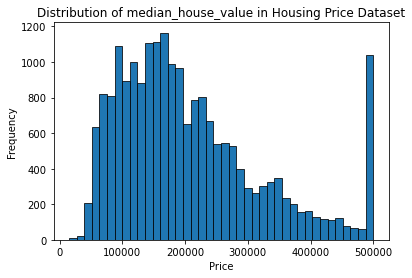

In [9]:
plt.figure(figsize=(6, 4))

sns.histplot(house_df.median_house_value, bins=40, alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of median_house_value in Housing Price Dataset')

plt.show()

Observation: Based on the above plot, "median_house_value" distribution is skewed to the left  and no long tail observed

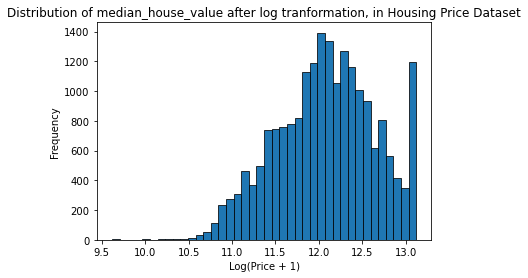

In [10]:
log_median_house_value = np.log1p(house_df.median_house_value)

plt.figure(figsize=(6, 4))

sns.histplot(log_median_house_value, bins=40, alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of median_house_value after log tranformation, in Housing Price Dataset')

plt.show()

Observation: Based on the above log plot, "median_house_value" distribution is normally distributed

### Feature Selection

For the rest of the homework, you'll need to use only these columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'
Select only them.

In [11]:
# Columns of interest
selective_columns = [   'latitude',
                        'longitude',
                        'housing_median_age',
                        'total_rooms',
                        'total_bedrooms',
                        'population',
                        'households',
                        'median_income',
                        'median_house_value']

In [12]:
# Filter selective columns
house_sel_df = house_df [selective_columns]

In [13]:
house_sel_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## Question 1: Find a feature with missing values. How many missing values does it have?

In [14]:
# Check for Features with missing values
house_sel_df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [15]:
#extract the columns name from Dataset
column_name = np.array(house_sel_df.columns.values)

# Function to display Features with missing values and how many missing values
def features_with_missing_value(column_name):
    for c in column_name:
        if( pd.isnull(house_sel_df[c]).values.ravel().sum() != 0):
            print("Total missing values in column:{} ->".format(c),pd.isna(house_sel_df[c]).values.ravel().sum())


# Display features with no.of instances of missing value
features_with_missing_value(column_name)

Total missing values in column:total_bedrooms -> 207


### Question 2: What's the median (50% percentile) for variable 'population'?

In [16]:
median =  np.median(house_sel_df['population'])
print("Q2 Answer --> median (50% percentile) for variable 'population' = ", median)

Q2 Answer --> median (50% percentile) for variable 'population' =  1166.0


# Split the data

In [17]:
# Change here the Validation and Test Percentage
VALIDATION_SET_PER = 0.2
TEST_SET_PER = 0.2

n = len(house_sel_df)

# Use seed 
np.random.seed(42)

# Shuffle the initial dataset
idx = np.arange(n)
np.random.shuffle(idx)

# Split  data in train/val/test sets, with 60%/20%/20% distribution.
n_val = int(n * VALIDATION_SET_PER)
n_test = int(n * TEST_SET_PER)
n_train = n - (n_val + n_test)


house_sel_df_shuffled = house_sel_df.iloc[idx]

df_train = house_sel_df_shuffled.iloc[:n_train].copy()
df_val = house_sel_df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = house_sel_df_shuffled.iloc[n_train+n_val:].copy()

In [18]:
# Verify the sum of data in train/val/test sets
if(n == n_val+n_test+n_train):
    print(f'\n n_val: {n_val}, n_test: {n_test} , n_train: {n_train}, n: {n}  ---> Data Splitting Successful')
else:
    print(f'\n n_val: {n_val}, n_test: {n_test} , n_train: {n_train} n: {n}  ---> Data Splitting Error')


 n_val: 4128, n_test: 4128 , n_train: 12384, n: 20640  ---> Data Splitting Successful


In [19]:
# Make sure that the target value ('median_house_value') is not in your dataframe.
target_variable = 'median_house_value'
y_train = df_train[target_variable]
y_val = df_val[target_variable]
y_test = df_test[target_variable]

# remove target variable from  train, validation, test data set
del df_train[target_variable]
del df_val[target_variable]
del df_test[target_variable]

In [20]:
#Apply the log transformation to the median_house_value variable using the np.log1p() function.
y_train = np.log1p(y_train.values)
y_val = np.log1p(y_val.values)
y_test = np.log1p(y_test.values)

## Linear regression model without regularization

In [21]:
# Linear Regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Root Mean Square Error
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [22]:
def prepare_X(df,fillna_value=0):
    X = df.copy()
    X = X.fillna(fillna_value).values
    return X

### Linear regression model without regularization and filling  missing values with zero

In [23]:
X_train = prepare_X(df_train,fillna_value=0)
w_0, w = train_linear_regression(X_train , y_train)
w_0, w 

(-11.686975241630112,
 array([-2.82087184e-01, -2.76255120e-01,  2.91329621e-03, -8.64531514e-06,
         1.50811922e-04, -2.08205659e-04,  5.69546573e-04,  1.71308139e-01]))

In [24]:
X_val = prepare_X(df_val,fillna_value=0)
y_pred = w_0 + X_val@w

score =rmse(y_val, y_pred)
rsme_zero = round(score,3)
print(f'Score = {score} , Score(8) = {round(score,8)} , Score(3) = {round(score,3)}')

Score = 0.3295330365228028 , Score(8) = 0.32953304 , Score(3) = 0.33


### Linear regression model without regularization and filling  missing values with mean

In [25]:
total_bedrooms_mean = df_train['total_bedrooms'].mean()
X_train = prepare_X(df_train,fillna_value=total_bedrooms_mean)
w_0, w = train_linear_regression(X_train , y_train)
w_0, w

(-11.759590872403509,
 array([-2.82182103e-01, -2.76809637e-01,  2.93033801e-03, -1.48543785e-05,
         2.48054046e-04, -2.03763456e-04,  4.87004092e-04,  1.73086593e-01]))

In [26]:
X_val = prepare_X(df_val,fillna_value=total_bedrooms_mean)
y_pred = w_0 + X_val@w

score =rmse(y_val, y_pred)
rsme_mean = round(score,3)
print(f'Score = {score} , Score(8) = {round(score,8)} , Score(3) = {round(score,3)}')

Score = 0.32901954390045857 , Score(8) = 0.32901954 , Score(3) = 0.329


Q3 Answer --> which option gives better rsme :Both Equally good

# Linear regression model with regularization

In [27]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [28]:
X_train = prepare_X(df_train,fillna_value=0)
X_val = prepare_X(df_val,fillna_value=0)

In [29]:
r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [30]:
for r in r_list:
    #Train model    
    w_0, w = train_linear_regression_reg(X_train , y_train,r=r)
    #Prediction    
    y_pred = w_0 + X_val@w

    score =rmse(y_val, y_pred)
    print('RMSE score with r:{} is   {} / {}'.format(r,round(score,2),score))    

RMSE score with r:0 is   0.33 / 0.3295330365228028
RMSE score with r:1e-06 is   0.33 / 0.32953303616529916
RMSE score with r:0.0001 is   0.33 / 0.32953300097053273
RMSE score with r:0.001 is   0.33 / 0.32953270386733674
RMSE score with r:0.01 is   0.33 / 0.3295319365992661
RMSE score with r:0.1 is   0.33 / 0.3296947205396713
RMSE score with r:1 is   0.33 / 0.3337887220007077
RMSE score with r:5 is   0.34 / 0.3392485345504316
RMSE score with r:10 is   0.34 / 0.34060638078083694


In [31]:
def train_val_test(df,seed, val_per, test_per, target_variable):
    
    np.random.seed(seed)

    n = len(df)

    n_val = int(val_per * n)
    n_test = int(test_per * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    y_train = df_train[target_variable]
    y_val = df_val[target_variable]
    y_test = df_test[target_variable]
    
    del df_train[target_variable]
    del df_val[target_variable]
    del df_test[target_variable]
    
    y_train = np.log1p(y_train.values)
    y_val = np.log1p(y_val.values)
    y_test = np.log1p(y_test.values)
    
    
    return df_train, df_val, df_test, y_train, y_val, y_test

In [32]:
# Change here the Validation and Test Percentage
VALIDATION_SET_PER = 0.2
TEST_SET_PER = 0.2
    
target_variable = 'median_house_value'
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [33]:
rsme_scores =[]

for seed in seed_list:
    np.random.seed(seed)
    
    df_train, df_val, df_test, y_train, y_val, y_test = \
    train_val_test(house_sel_df,seed, VALIDATION_SET_PER, TEST_SET_PER, target_variable)
    
    X_train = prepare_X(df_train,fillna_value=0)
    #Train model
    w_0, w = train_linear_regression(X_train , y_train)
    
    X_val = prepare_X(df_val,fillna_value=0)
    
    #Prediction
    y_pred = w_0 + X_val@w

    rsme_score =rmse(y_val, y_pred)
    rsme_scores.append(rsme_score)
    
rsme_scores

[0.3388430480530033,
 0.3362387255956208,
 0.3320912318842181,
 0.3405153609035696,
 0.3389024066572879,
 0.34348667257195825,
 0.3451980953099266,
 0.33959899274133615,
 0.34662308731835895,
 0.33659261241674004]

In [34]:
sd = np.array(rsme_scores).std()
print(f"Standard Deviation :{sd} ")

Standard Deviation :0.004170771946628243 


In [35]:
sd = round(np.array(rsme_scores).std(), 3)
print(f"Q5 Answer --> Standard deviation of all the scores with different seeds {sd}" )

Q5 Answer --> Standard deviation of all the scores with different seeds 0.004


In [36]:
seed =9
r=0.001

np.random.seed(seed)
df_train, df_val, df_test, y_train, y_val, y_test = \
    train_val_test(house_sel_df,seed, VALIDATION_SET_PER, TEST_SET_PER, target_variable)

df_train = pd.concat([df_train,df_val])
y_train = np.concatenate((y_train, y_val), axis=0)

    
X_train = prepare_X(df_train,fillna_value=0)
    #Train model
w_0, w = train_linear_regression_reg(X_train , y_train,r=r)
    
X_test = prepare_X(df_test,fillna_value=0)
    
#Prediction
y_pred = w_0 + X_test@w

rsme_score =rmse(y_test, y_pred)
rsme_score

0.34531689143692823

In [37]:
print(f"Q6 Answer --> What's the RMSE on the test dataset {round(rsme_score,2)}" )

Q6 Answer --> What's the RMSE on the test dataset 0.35
